In [43]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [56]:
(x_train, y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [57]:
y_train.shape

(60000,)

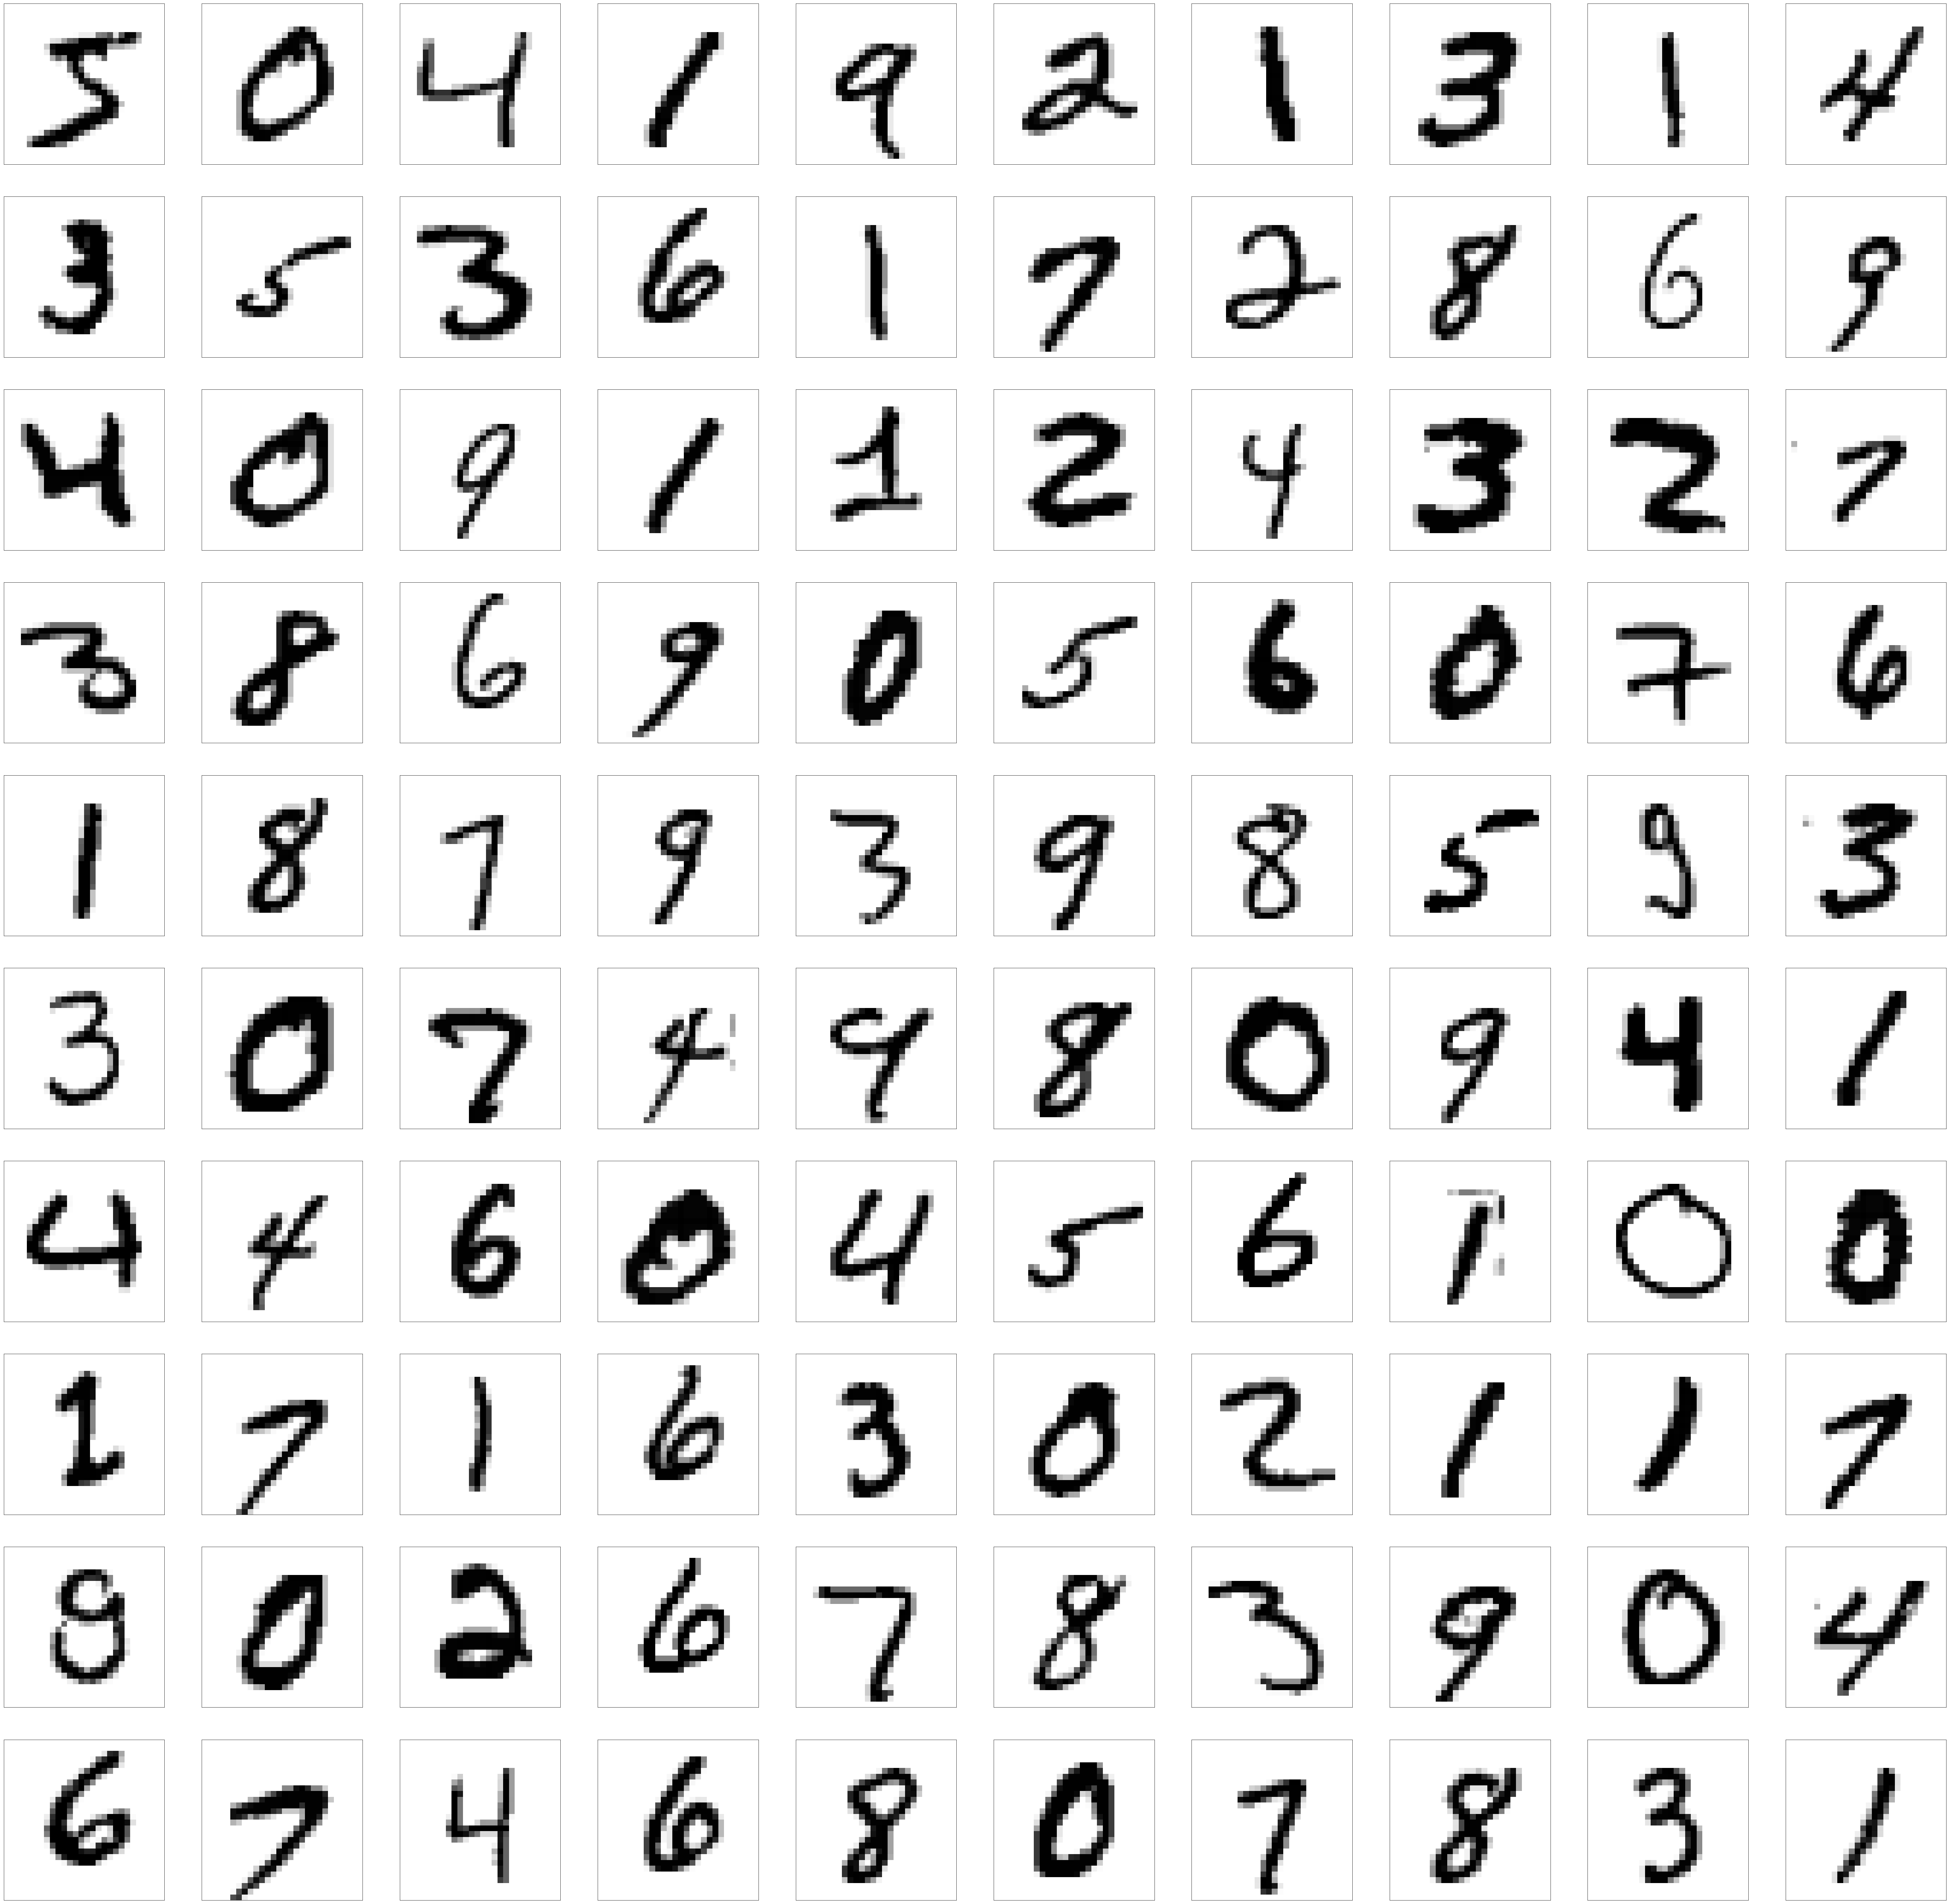

In [55]:
plt.figure(figsize=(100,100)) # size of figure
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [58]:
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [59]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [60]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [61]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [62]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 252us/sample - loss: 0.2259 - acc: 0.9341 - val_loss: 0.1159 - val_acc: 0.9657
Epoch 2/10
48000/48000 [==============================] - 11s 237us/sample - loss: 0.0893 - acc: 0.9732 - val_loss: 0.0910 - val_acc: 0.9721
Epoch 3/10
48000/48000 [==============================] - 11s 237us/sample - loss: 0.0576 - acc: 0.9818 - val_loss: 0.0934 - val_acc: 0.9715
Epoch 4/10
48000/48000 [==============================] - 11s 238us/sample - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0873 - val_acc: 0.9739
Epoch 5/10
48000/48000 [==============================] - 11s 236us/sample - loss: 0.0287 - acc: 0.9911 - val_loss: 0.0809 - val_acc: 0.9760
Epoch 6/10
48000/48000 [==============================] - 12s 243us/sample - loss: 0.0214 - acc: 0.9933 - val_loss: 0.0749 - val_acc: 0.9797
Epoch 7/10
48000/48000 [==============================] - 12s 246us/sample - loss: 0.0187 - acc: 0.9939 

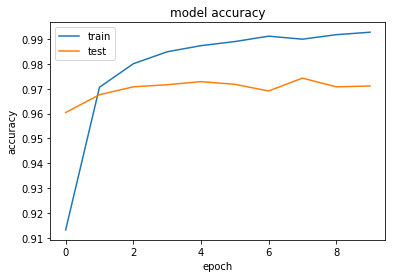

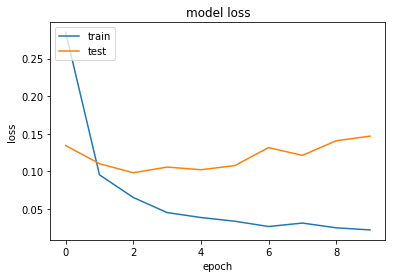

In [41]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.1332 - acc: 0.9724


[0.13324685952800355, 0.9724]

In [63]:
from IPython.display import HTML

In [64]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [25]:
HTML(input_form + javascript)

In [70]:
len(image)

784

<BarContainer object of 10 artists>

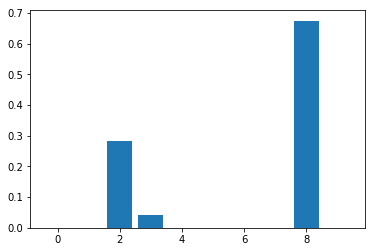

In [68]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols])
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))